# Clean Assignment Code 

Import modules

In [53]:
# System tools
import os

# Data analysis
import pandas as pd
from collections import Counter
from itertools import combinations 
from tqdm import tqdm
import random
from datetime import datetime

# NLP
import spacy
nlp = spacy.load("en_core_web_sm")

# Network analysis tools
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

# Regular expressions 
import re

__Load data__

In [2]:
# Get dataset  
# Get the filepath
# filepath = os.path.join("in", "cit-HepPh.txt")
# Reading the filepath 
# with open(filepath, "r") as f:
    # txt = f.read()

In [3]:
# Get rid of hastaged lines 
# txt_data = txt.split("\n", 4)[4]

In [4]:
# Write new file without hastags
# outpath = os.path.join("in", "cit_HepPh_read.txt")
# with open(outpath, "w") as f:
    # f.write(txt_data)

In [2]:
# Load data without hastag  
# Get the filepath
filepath = os.path.join("in", "cit_HepPh_read.txt")
# Reading the filepath 
data = pd.read_csv(filepath, header = None, sep='\t', names = ("Source", "Target"))

__Lets try to downsample__

In [6]:
# Check data type

In [3]:
# data.dtypes

In [5]:
# data["Source"] = data["Source"].apply(str)
# data["Target"] = data["Target"].apply(str)

In [71]:
# Get dataframe of the nr. of appearances of each ID
# count_df = data.apply(pd.value_counts)

In [72]:
# count_df.head()

Source  Target
10002    28.0    16.0
10003    15.0   113.0
10004    22.0     6.0
10005     1.0     NaN
10006    23.0     5.0

In [73]:
# count_df["sum"] = count_df.sum(axis=1)

In [74]:
# count_df.head()

Source  Target    sum
10002    28.0    16.0   44.0
10003    15.0   113.0  128.0
10004    22.0     6.0   28.0
10005     1.0     NaN    1.0
10006    23.0     5.0   28.0

In [75]:
# count_df["sum"].sort_values(ascending=False)

9803315    846.0
9512380    635.0
9804398    622.0
9407339    568.0
9606399    559.0
           ...  
9206251      1.0
11255        1.0
9206265      1.0
9207208      1.0
9207243      1.0
Name: sum, Length: 34546, dtype: float64

In [76]:
# len(data)

421578

In [77]:
# len(count_df)

34546

In [78]:
# count_df["sum"].mean()

24.406761998494762

In [79]:
# filter_df = count_df[count_df["sum"] >= 200]

In [80]:
# len(filter_df)

143

In [81]:
# Make list of filter data
# filter_list = filter_df.index.tolist()

In [82]:
# type(filter_list[0])

str

In [83]:
# subset_data = data[data["Source"].isin(filter_list) | data["Target"].isin(filter_list)]

In [84]:
# subset_data.head()

Source   Target
28  9702314  9501384
61   112133   104110
65   112133  9512380
80  9501265  9304257
83   104110     1113

In [85]:
# len(subset_data)

40508

__Let's try to downsample in a different way__

By removing all the edges involving the more uncommon articles

In [68]:
# Get dataframe of the nr. of appearances of each ID
# count_df = data.apply(pd.value_counts)

In [28]:
# Get nr. of appearances across source and target columns
# count_df["sum"] = count_df.sum(axis=1)

In [29]:
# Get common articles using threshold
# threshold_df = count_df[count_df["sum"] >= 500]

In [30]:
# Get the most common articles using nr. of articles 
# most_common = count_df["sum"].sort_values(ascending=False)[:100]

In [67]:
# Make list of filter data
# filter_list = filter_df.index.tolist()

In [2]:
# Subset the data 
# subset_data = data[data["Source"].isin(filter_list) | data["Target"].isin(filter_list)]

__Downsample randomly__

In [3]:
# Int to string
# data["Source"] = data["Source"].apply(str)
# data["Target"] = data["Target"].apply(str)

In [7]:
# Make list of filter data
# source_list = data.Source.tolist()
# target_list = data.Target.tolist()
# source_list.extend(target_list)
# len(source_list)

843156

In [8]:
# one_column = pd.DataFrame(source_list, columns =["ID"])

In [9]:
# one_column.head()

ID
0  9907233
1  9907233
2  9907233
3  9907233
4  9907233

In [101]:
# node_list = data["Source"].unique().tolist()

In [102]:
# len(node_list)

32158

In [12]:
# df = pd.DataFrame() # empty dataframe
# df2 = pd..DataFrame(...) # some dataframe with data

#df = pd.concat([df, df2])

# node = random.choice(node_list)

In [19]:
# edge = data[data["Source"] == node].sample(n=1)

In [14]:
# df = pd.DataFrame()

In [20]:
# df = pd.concat([df, edge])


In [21]:
# df.head()

Source   Target
377515   3190     1098
377527   3190  9606223

In [4]:
# edge_array = []

# while len(edge_array) < 100:
    # node = random.choice(node_list)
    # edge = data[data["Source"] == node].sample()
    # edge_tupple = (edge["Source"].values[0], edge["Target"].values[0])
    # if (edge_tupple in edge_array):
        # pass
    # else: 
        # edge_array.append(edge_tupple)



In [5]:
# len(edge_array)

In [6]:
# len(node_list)

In [7]:
# edge_array[0:10]

In [105]:
# edge_df = pd.DataFrame(edge_array, columns =["Source", "Target"])

__Write function__

In [114]:
def node_edge_sample(data, nr_samples):
    # Get list of source nodes
    node_list = data["Source"].unique().tolist()
    
    # Define empthy list
    edge_list = []

    # As long as the list does not contain enough samples...
    while len(edge_list) < nr_samples:
        # Get a random source node
        node = random.choice(node_list)
        # Get a random edge incident to the node
        edge = data[data["Source"] == node].sample()
        # Turn edge into tupple
        edge_tupple = (edge["Source"].values[0], edge["Target"].values[0])
        # Check if edge is already sampled
        if (edge_tupple in edge_list):
            pass
        else: 
            # Append to edge_list
            edge_list.append(edge_tupple)
    
    # Convert to dataframe 
    edge_df = pd.DataFrame(edge_list, columns =["Source", "Target"])
    
    return edge_df

In [117]:
# edge_df = node_edge_sample(data, 1000)

In [118]:
# len(edge_df)

1000

In [109]:
# edge_df.head()

Source   Target
0  9903408  9511220
1     9201  9905436
2  9708201  9410326
3   101228     9208
4  9911455  9810512

In [79]:
# edge_array = []
# node = random.choice(node_list)
# edge = data[data["Source"] == node].sample()
# edge_tupple = (edge["Source"].values[0], edge["Target"].values[0])
# edge_array.append(edge_tupple)


In [81]:
# edge_tupple in edge_array

True

In [54]:
# df.head()

Source   Target
181323  9803300  9507380
236258   204039  9903328
363075  9711515  9408365
19698    106247   106207
25147   9911323  9706554

In [66]:
# output = df.iloc[0, : ].tolist() == edge.iloc[0, :].tolist()

In [67]:
# output

False

In [65]:
# type(output)

bool

In [4]:
# G = nx.from_pandas_edgelist(data, source='Source',target='Target', edge_attr=None, create_using=nx.DiGraph())
# walks = walker.random_walks(G, n_walks=15, walk_len=10)

/opt/conda/lib/python3.9/site-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Random walks - T=1.22s


In [5]:
# len(walks)

518190

In [122]:
# len(G)

1898

__Random node selection with exclution of very rare nodes__

In [8]:
# Get dataframe of the nr. of appearances of each ID
count_df = data.apply(pd.value_counts)

In [9]:
count_df.head()

Source  Target
1001    29.0    43.0
1002    26.0   118.0
1003    18.0     6.0
1004     NaN     2.0
1005    23.0    63.0

In [10]:
import statistics

In [11]:
count_df["Source"].mean()

13.10958392934884

In [12]:
count_df["Source"].min()

1.0

In [13]:
filter_list = count_df[count_df["Source"] > 10].index.tolist()

In [14]:
len(filter_list)

13772

In [15]:
filter_df = data[data["Source"].isin(filter_list)]

In [16]:
len(filter_df)

332507

In [17]:
random.seed(42)
# Get list of source nodes
node_list = filter_df["Source"].unique().tolist()
# Get a random sample
sample_nodes = random.sample(node_list, 100)

In [18]:
# Subsample those nodes
sample_df = data[data["Source"].isin(sample_nodes) | data["Target"].isin(sample_nodes)]

In [19]:
len(sample_df)

3777

__Acting on a hunch__

In [55]:
# subset_data["Source"] = 'str' + subset_data["Source"].astype(str)
# subset_data["Target"] = 'str' + subset_data["Target"].astype(str)

In [76]:
# subset_data.loc[:, "Source"] # Preferred? 

65         str112133
134        str104110
171       str9512380
172       str9512380
173       str9512380
             ...    
421428     str210082
421502     str212214
421503     str212214
421506     str212214
421520     str211423
Name: Source, Length: 17685, dtype: object

In [80]:
# subset_data.shape

(126701, 2)

__Create graph__

In [22]:
# This seems to create a directed grapth
G = nx.from_pandas_edgelist(sample_df, source='Source',target='Target', edge_attr=None, create_using=nx.DiGraph())
nx.is_directed(G)

True

In [23]:
len(G)

3209

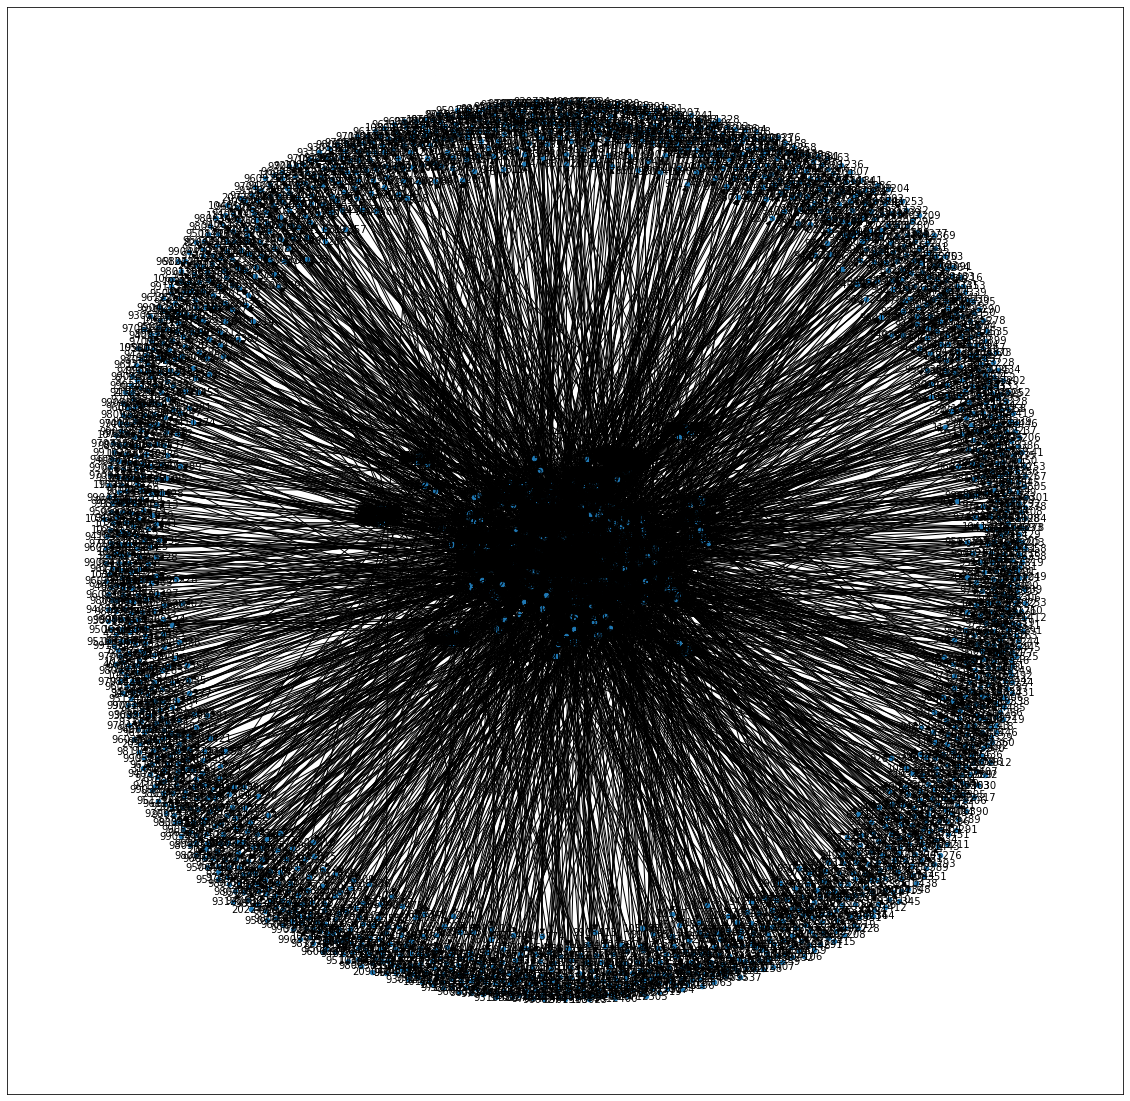

In [24]:
# This is what I have trouble with
nx.draw_networkx(G, with_labels=True, node_size=20, font_size=10)

__Centrality measures__

Degree centrality

In [159]:
# Degree
degrees = G.degree()

In [160]:
degrees_df = pd.DataFrame(degrees, columns = ["names", "degrees"])
degrees_df.sort_values("degrees", ascending=False).head()

names  degrees
13  9602260      185
43   102146      148
51  9606386      113
60  9610224       99
1   9511342       78

In [161]:
# In degree 
in_degrees = G.in_degree()

In [162]:
in_degrees_df = pd.DataFrame(in_degrees, columns = ["names", "in_degrees"])
in_degrees_df.sort_values("in_degrees", ascending=False).head()

names  in_degrees
43   102146         134
13  9602260         132
51  9606386          77
1   9511342          66
60  9610224          61

In [163]:
# Out degree
out_degrees = G.out_degree()

In [164]:
out_degrees_df = pd.DataFrame(out_degrees, columns = ["names", "out_degrees"])
out_degrees_df.sort_values("out_degrees", ascending=False).head()

names  out_degrees
80    9904469           62
1591   106024           61
13    9602260           53
2626  9907247           45
120    110213           43

Betweeness centrality

In [165]:
# Betweenness centrality
# This one takes really, really long with the full dataset, so it might be a good idea to filter the data somehow
bc = nx.betweenness_centrality(G)

In [166]:
betweenness_df = pd.DataFrame(bc.items(), columns = ["names", "betweeness"])
betweenness_df.head()

names    betweeness
0  9903229  3.414155e-07
1  9511342  1.129883e-04
2     3033  1.892997e-06
3  9610424  1.216927e-05
4  9712400  3.669372e-05

Eigenvector centrality

In [167]:
ev = nx.eigenvector_centrality(G)

In [168]:
eigenvector_df = pd.DataFrame(ev.items())

In [170]:
eigenvector_df.sort_values(1, ascending=False)

0             1
133   9803315  2.708977e-01
775   9812489  2.564222e-01
161   9211309  2.564222e-01
774   9810410  2.564222e-01
773   9806263  2.564222e-01
...       ...           ...
1937   109291  9.629509e-13
1936   204036  9.629509e-13
1935   212078  9.629509e-13
1934  9612378  9.629509e-13
2720  9702231  9.629509e-13

[2721 rows x 2 columns]

__Create reading list__

In [25]:
def centrality_scores(G):
    # Finding degrees and creating dataframe 
    degrees = G.degree()
    df = pd.DataFrame(degrees, columns = ["ID", "degree"])
    # Finding in degree
    in_degrees = G.in_degree()
    df["in_degree"] = [v for k, v in in_degrees]
    # Finding out degree
    out_degrees = G.out_degree()
    df["out_degree"] = [v for k, v in out_degrees]
    # Finding and adding betweenness centrality 
    bc = nx.betweenness_centrality(G)
    df["betweenness"] = bc.values()
    # Finding and adding eigrnvector centrality
    ev = nx.eigenvector_centrality(G)
    df["eigenvector"] = ev.values()
    
    # Saving the dataframe
    outpath = os.path.join("output", "centrality_df.csv")
    df.to_csv(outpath, index=False)
    
    return df

In [26]:
scores = centrality_scores(G)

In [27]:
scores.head()

ID  degree  in_degree  out_degree  betweenness   eigenvector
0  9512380       4          3           1     0.000045  6.501143e-05
1  9503492     131        114          17     0.000459  1.625483e-04
2    12308       1          0           1     0.000000  8.211974e-20
3  9908520      32         14          18     0.000137  6.500995e-05
4  9910236       1          0           1     0.000000  8.211974e-20

__Put together reading list__

In [28]:
scores.sort_values(by="degree", ascending=False).head()

ID  degree  in_degree  out_degree  betweenness   eigenvector
8    9807423     134        116          18     0.000316  3.250498e-05
1    9503492     131        114          17     0.000459  1.625483e-04
399  9602238     107         40          67     0.000287  1.228922e-15
5    9908395     100         39          61     0.000471  3.633736e-10
956   210342      90          6          84     0.000188  2.126901e-17

In [29]:
high_degree = scores.nlargest(5, "degree")
high_in = scores.nlargest(5, "in_degree")
high_out = scores.nlargest(5, "out_degree")
high_bc = scores.nlargest(5, "betweenness")
high_ev = scores.nlargest(5, "eigenvector")
reading_list = pd.concat([high_degree, high_in, high_out, high_bc, high_ev])

In [30]:
len(reading_list)

25

In [31]:
reading_list = reading_list.drop_duplicates() 

In [32]:
len(reading_list)

17

In [33]:
reading_list.head()

ID  degree  in_degree  out_degree  betweenness   eigenvector
8    9807423     134        116          18     0.000316  3.250498e-05
1    9503492     131        114          17     0.000459  1.625483e-04
399  9602238     107         40          67     0.000287  1.228922e-15
5    9908395     100         39          61     0.000471  3.633736e-10
956   210342      90          6          84     0.000188  2.126901e-17

__Make graph of reading list__

In [34]:
# Filtering nodes
filter_list = reading_list["ID"].tolist()

In [35]:
reading_edges = data[data["Source"].isin(filter_list) & data["Target"].isin(filter_list)]

In [36]:
len(reading_edges)

21

In [37]:
# This seems to create a directed grapth
sub_G = nx.from_pandas_edgelist(reading_edges, source='Source',target='Target', edge_attr=None, create_using=nx.DiGraph())
nx.is_directed(sub_G)

True

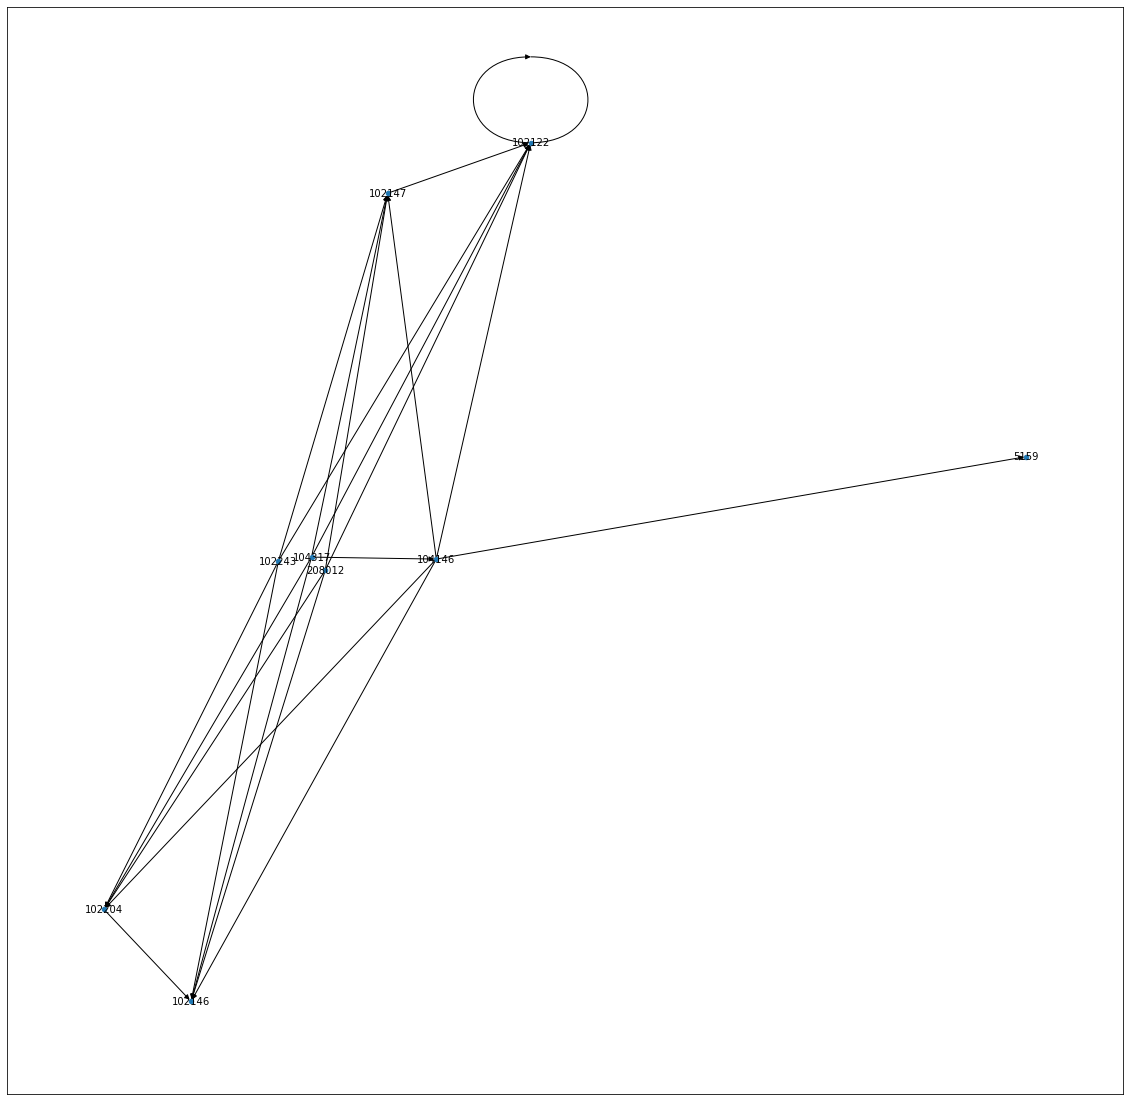

In [38]:
# This is what I have trouble with
nx.draw_networkx(sub_G, with_labels=True, node_size=20, font_size=10)

__Histogram of dates__

Load dates

In [39]:
# Get dataset  
# Get the filepath
filepath = os.path.join("in", "cit-HepPh-dates.txt")
# Reading the filepath 
with open(filepath, "r") as f:
    txt = f.read()

In [40]:
split_txt = txt.split("\n")
txt_data = list(filter(lambda x: "#" not in x, split_txt))

In [41]:
type(split_txt)

list

In [42]:
txt_data = '\n'.join(txt_data)

In [43]:
# Write new file without hastags
outpath = os.path.join("in", "cit_HepPh_dates_read.txt")
with open(outpath, "w") as f:
    f.write(txt_data)

In [69]:
# Load data without hastag  
# Get the filepath
filepath = os.path.join("in", "cit_HepPh_dates_read.txt")
# Reading the filepath 
dates = pd.read_csv(filepath, header = None, sep='\t', names = ("ID", "date"))

In [70]:
dates.head()

ID        date
0  9203201  1992-02-24
1  9203202  1992-03-08
2  9203203  1992-03-03
3  9203204  1992-03-09
4  9203205  1992-03-09

Add dates to data

In [49]:
merged = pd.merge(data, dates, on="Source")

In [50]:
merged.head()

Source   Target        date
0  9907233  9301253  1999-07-05
1  9907233  9504304  1999-07-05
2  9907233  9505235  1999-07-05
3  9907233  9506257  1999-07-05
4  9907233  9606402  1999-07-05

Histogram

Convert dates

In [52]:
# Check types
merged.dtypes

Source     int64
Target     int64
date      object
dtype: object

In [56]:
# Turn to date-time
string = "1999-07-05"
date_obj = datetime.strptime(string, "%Y-%m-%d")

In [60]:
date_obj

datetime.datetime(1999, 7, 5, 0, 0)

In [67]:
dates.head()

Source       date
0  9203201 1992-02-24
1  9203202 1992-03-08
2  9203203 1992-03-03
3  9203204 1992-03-09
4  9203205 1992-03-09

In [71]:
# Convert data
# dates["date"] = dates["date"].apply(datetime.strptime("%Y-%m-%d"))
dates["date"] = pd.to_datetime(dates["date"], format = "%Y-%m-%d")

In [72]:
dates.dtypes

ID               int64
date    datetime64[ns]
dtype: object

In [74]:
scores.head()

ID  degree  in_degree  out_degree  betweenness   eigenvector
0  9512380       4          3           1     0.000045  6.501143e-05
1  9503492     131        114          17     0.000459  1.625483e-04
2    12308       1          0           1     0.000000  8.211974e-20
3  9908520      32         14          18     0.000137  6.500995e-05
4  9910236       1          0           1     0.000000  8.211974e-20

In [75]:
merged = pd.merge(scores, dates, on="ID")

In [83]:
merged.head()

ID  degree  in_degree  out_degree  betweenness   eigenvector  \
0  9512380       4          3           1     0.000045  6.501143e-05   
1  9503492     131        114          17     0.000459  1.625483e-04   
2    12308       1          0           1     0.000000  8.211974e-20   
3  9908520      32         14          18     0.000137  6.500995e-05   
4  9910236       1          0           1     0.000000  8.211974e-20   

        date  
0 1995-12-15  
1 1995-04-01  
2 2000-12-22  
3 1999-08-31  
4 1999-10-05

In [94]:
merged.groupby('date').mean().head()

ID  degree  in_degree  out_degree  betweenness  \
date                                                                
1992-02-24  9203201.0     2.0        2.0         0.0          0.0   
1992-03-03  9203203.0     2.0        2.0         0.0          0.0   
1992-03-29  9203223.0     3.0        3.0         0.0          0.0   
1992-03-30  9203225.0     1.0        1.0         0.0          0.0   
1992-04-02  9204205.5     1.0        1.0         0.0          0.0   

             eigenvector  
date                      
1992-02-24  5.262233e-16  
1992-03-03  5.262233e-16  
1992-03-29  2.470505e-12  
1992-03-30  1.486696e-15  
1992-04-02  5.985379e-15

In [95]:
merged['year'] = pd.DatetimeIndex(merged['date']).year

In [105]:
merged.head()

ID  degree  in_degree  out_degree  betweenness   eigenvector  \
0  9512380       4          3           1     0.000045  6.501143e-05   
1  9503492     131        114          17     0.000459  1.625483e-04   
2    12308       1          0           1     0.000000  8.211974e-20   
3  9908520      32         14          18     0.000137  6.500995e-05   
4  9910236       1          0           1     0.000000  8.211974e-20   

        date  year    month  
0 1995-12-15  1995  1995-12  
1 1995-04-01  1995  1995-04  
2 2000-12-22  2000  2000-12  
3 1999-08-31  1999  1999-08  
4 1999-10-05  1999  1999-10

In [104]:
merged['month'] = merged['date'].apply(lambda x: x.strftime('%Y-%m'))

In [122]:
mean_df = merged.drop(["ID", "date", "year"], axis=1).groupby("month").mean().reset_index()

In [123]:
mean_df.head()

month  degree  in_degree  out_degree  betweenness   eigenvector
0  1992-02   2.000      2.000         0.0          0.0  5.262233e-16
1  1992-03   2.000      2.000         0.0          0.0  8.241726e-13
2  1992-04   1.000      1.000         0.0          0.0  3.142805e-15
3  1992-05   1.500      1.500         0.0          0.0  1.377230e-15
4  1992-06   1.375      1.375         0.0          0.0  6.675002e-13

In [125]:
mean_df.dtypes

month          datetime64[ns]
degree                float64
in_degree             float64
out_degree            float64
betweenness           float64
eigenvector           float64
dtype: object

In [124]:
mean_df["month"] = pd.to_datetime(mean_df["month"], format = "%Y-%m")

Text(0.5, 1.0, 'Date histogram')

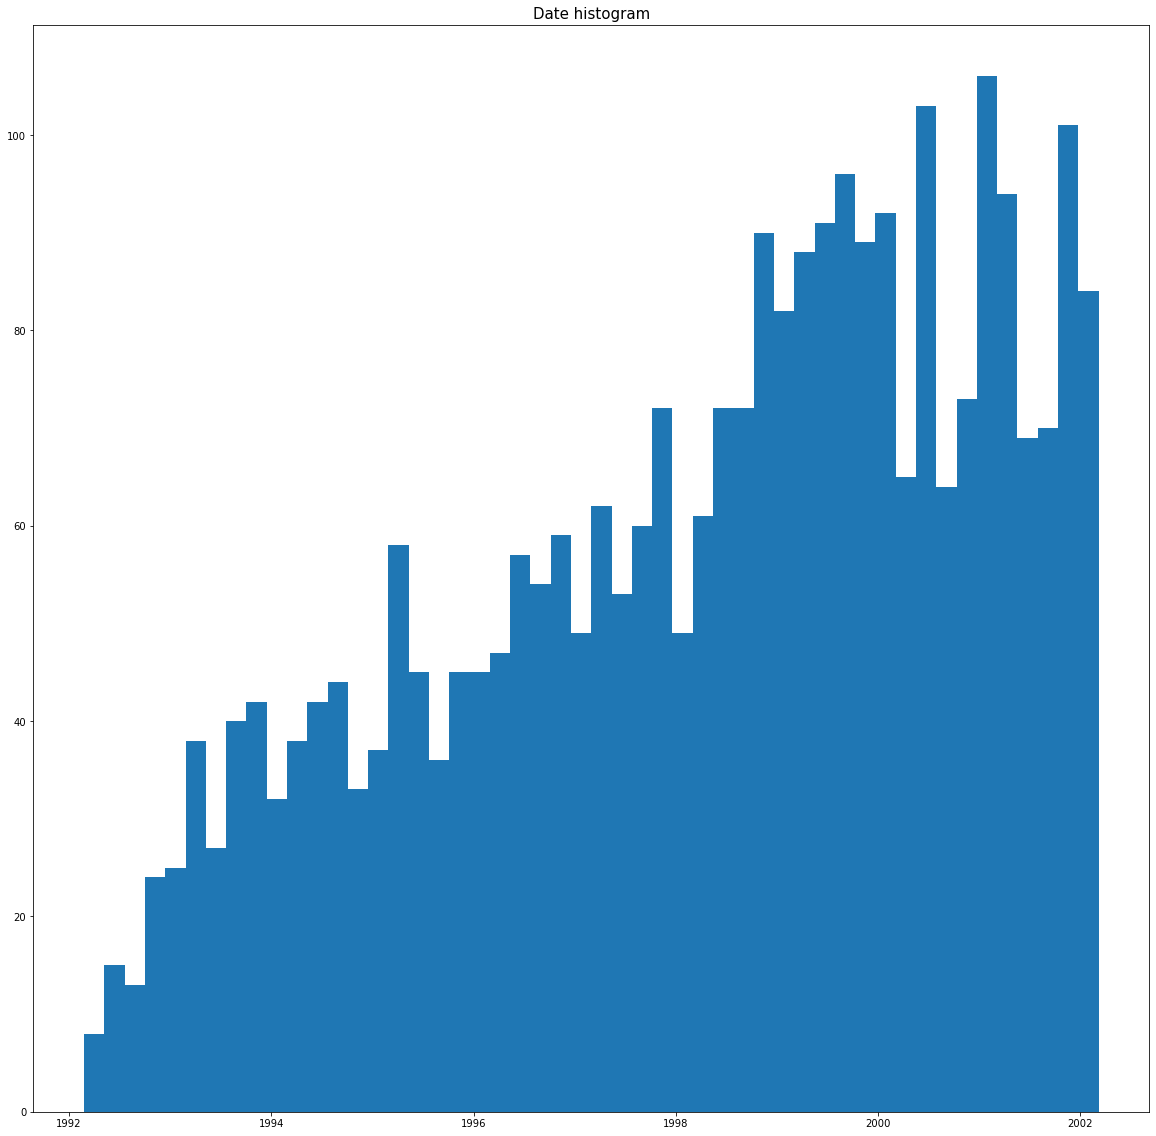

In [79]:
fig, ax = plt.subplots()
ax.hist(merged["date"], bins = 50)
plt.title("Date histogram", fontsize = 15)

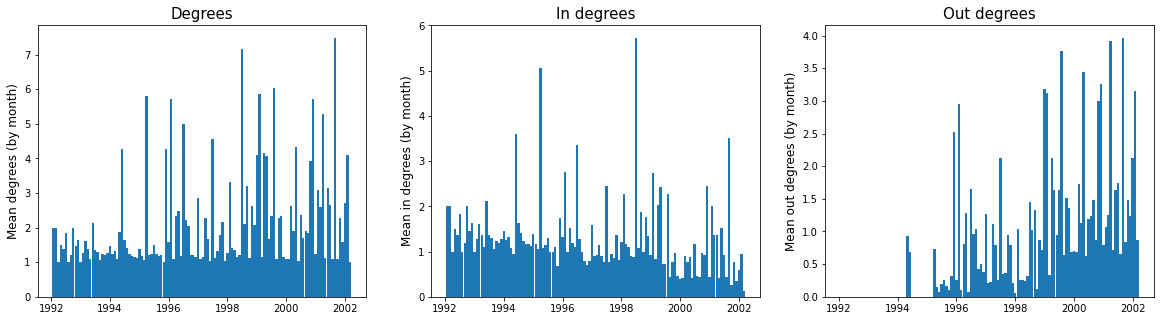

In [147]:
# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(20, 5)

# Draw bars
ax1.set_title("Degrees", fontsize = 15)
ax1.set_ylabel("Mean degrees (by month)", fontsize = 12)
ax1.bar(mean_df["month"], mean_df["degree"], width = 30)
ax2.set_title("In degrees", fontsize = 15)
ax2.set_ylabel("Mean in degrees (by month)", fontsize = 12)
ax2.bar(mean_df["month"], mean_df["in_degree"], width = 30)
ax3.set_title("Out degrees", fontsize = 15)
ax3.set_ylabel("Mean out degrees (by month)", fontsize = 12)
ax3.bar(mean_df["month"], mean_df["out_degree"], width = 30)

# plt.legend()
# plt.show()

# Save plot
plt.savefig(os.path.join("output", "degree_img.png"), bbox_inches = "tight")

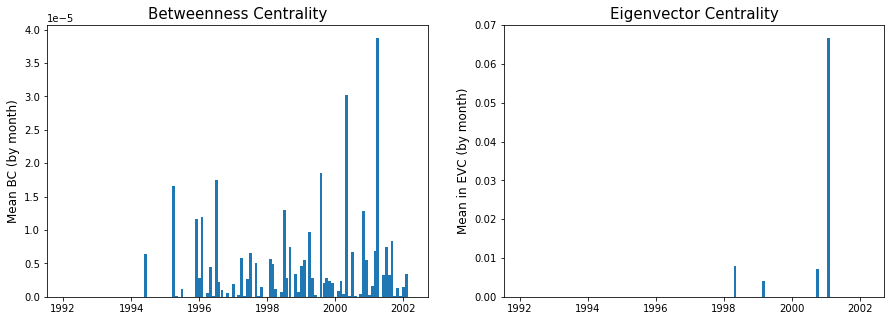

In [150]:
# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

# Draw bars
ax1.set_title("Betweenness Centrality", fontsize = 15)
ax1.set_ylabel("Mean BC (by month)", fontsize = 12)
ax1.bar(mean_df["month"], mean_df["betweenness"], width = 30)
ax2.set_title("Eigenvector Centrality", fontsize = 15)
ax2.set_ylabel("Mean in EVC (by month)", fontsize = 12)
ax2.bar(mean_df["month"], mean_df["eigenvector"], width = 30)

# plt.legend()
# plt.show()

# Save plot
plt.savefig(os.path.join("output", "bc_ev_img.png"), bbox_inches = "tight")